# **Employee Churn Prediction**

Steps:
1. Data understanding
2. Data cleaning
3. Data visualization
4. Feature engineering
5. Train ML model
6. Evaluation
7. Conclusion

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# **1. Data understanding**

**Columns with definition:**

`CustomerID:` Unique identifier for each customer

`Age:` Age of the customer, reflecting their demographic profile.

`Gender:` Gender of the customer (Male or Female).

`Tenure:` Duration (in months) the customer has been with the service provider.

`MonthlyCharges:` The monthly fee charged to the customer.

`ContractType:` Type of contract the customer is on (Month-to-Month, One-Year, Two-Year).

`InternetService:` Type of internet service subscribed to (DSL, Fiber Optic, None).

`TechSupport:` Whether the customer has tech support (Yes or No).

`TotalCharges:` Total amount charged to the customer (calculated as MonthlyCharges * Tenure).

`Churn:` Target variable indicating whether the customer has churned (Yes or No).


In [7]:
df = pd.read_csv("/content/drive/MyDrive/datasets/customer_churn_data.csv")

In [8]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


# **2. Data cleaning**

We checked for missing values and found that the `InternetService` column has 297 missing values. We will fill these missing values with an empty string. While this is a simple approach, for more advanced modeling, exploring strategies like imputing with the mode or a dedicated 'No Internet Service' category might be beneficial.

In [10]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [11]:
df["InternetService"] = df["InternetService"].fillna("")

In [12]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,0
TotalCharges,0
TechSupport,0
Churn,0


In [13]:
df.duplicated().sum()

np.int64(0)

# **3. Data Visualization**

We visualize the data to gain insights into the customer characteristics and their relationship with churn. This helps us understand patterns and trends that might be useful for building our prediction model.

In [62]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


### Correlation Heatmap

We visualize the correlation matrix of the numerical features to understand the relationships between them. A high correlation between a feature and the target variable (Churn) might indicate its importance in predicting churn.

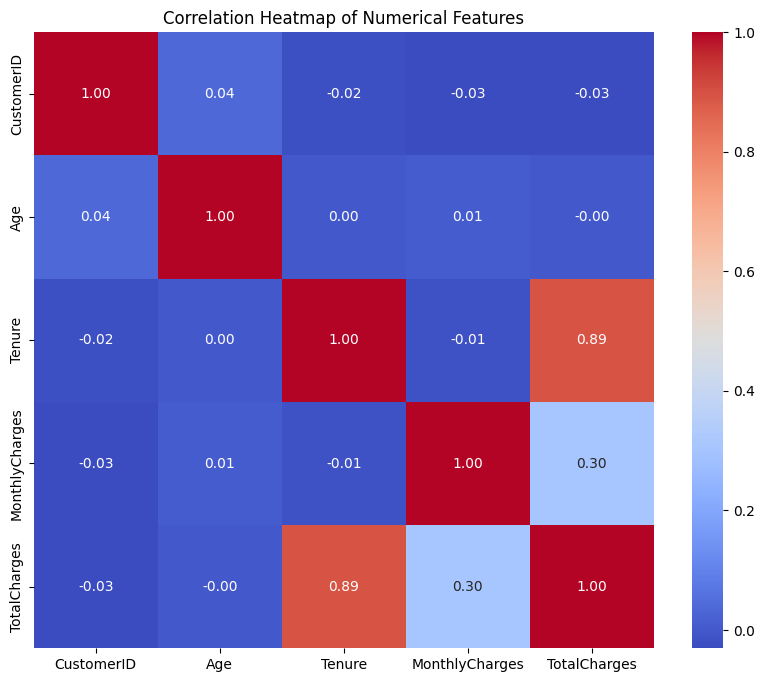

In [63]:
numeric_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Churn Distribution

We examine the distribution of the target variable, `Churn`, to see the proportion of customers who churned versus those who did not. This helps us understand the class imbalance in the dataset.

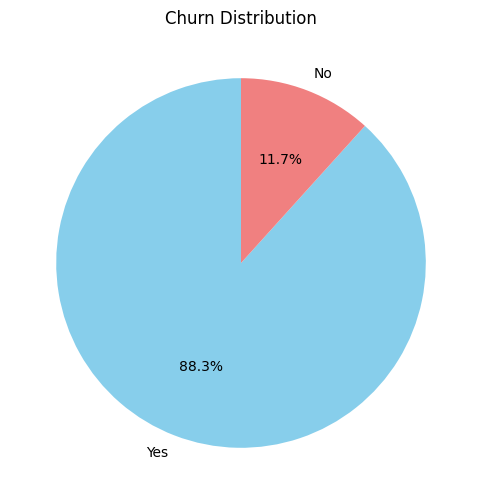

In [64]:
churn_counts = df["Churn"].value_counts()
plt.figure(figsize=(6, 6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Churn Distribution")
plt.ylabel('') # Remove default y-label for pie chart
plt.show()

From the pie chart, we can observe the proportion of customers who churned versus those who did not. This highlights the class imbalance in the dataset, with a higher number of customers who did churn.

### Monthly Charges Analysis

We analyze the average monthly charges for churned and non-churned customers, and also break this down by gender, to see if there are any notable differences.

In [65]:
print("Average Monthly Charges by Churn:")
print(df.groupby("Churn")['MonthlyCharges'].mean())

Average Monthly Charges by Churn:
Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64


In [66]:
print("\nAverage Monthly Charges by Churn and Gender:")
print(df.groupby(['Churn', 'Gender'])['MonthlyCharges'].mean())


Average Monthly Charges by Churn and Gender:
Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64


*   The average monthly charges are higher for customers who churned compared to those who did not.
*   Looking at the breakdown by gender, male customers who churned have slightly higher average monthly charges than female customers who churned. However, among customers who did not churn, females have higher average monthly charges than males.

### Tenure Analysis

We examine the average tenure for churned and non-churned customers to see if the duration of their subscription is related to churn.

In [67]:
print("Average Tenure by Churn:")
print(df.groupby("Churn")['Tenure'].mean())

Average Tenure by Churn:
Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64


Customers who stayed with the company (Did Not Churn) have a significantly higher average tenure compared to those who churned. This suggests that longer-term customers are less likely to churn.

### Age Analysis

We compare the average age of churned and non-churned customers.

In [68]:
print("Average Age by Churn:")
print(df.groupby("Churn")['Age'].mean())

Average Age by Churn:
Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64


The average age of customers who churned is slightly higher than those who did not churn.

### Monthly Charges by Contract Type

We visualize the average monthly charges across different contract types to see if the contract duration influences the monthly fees.

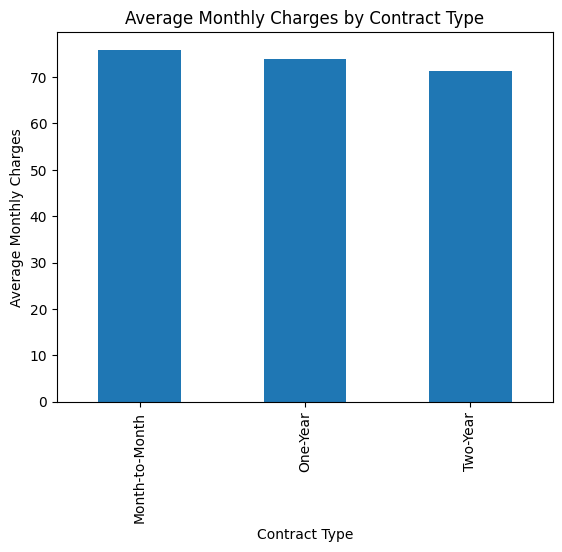

In [69]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charges by Contract Type')
plt.xlabel("Contract Type")
plt.ylabel("Average Monthly Charges")
plt.show()

Customers with Month-to-Month contracts have the highest average monthly charges, while those with Two-Year contracts have the lowest. This aligns with typical pricing strategies where longer commitments come with lower monthly rates.

### Distribution of Monthly Charges

We visualize the distribution of monthly charges using a histogram to understand the frequency of different charge amounts.

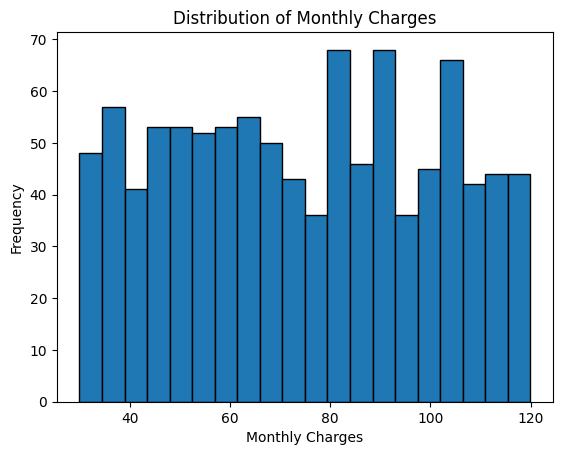

In [70]:
plt.hist(df['MonthlyCharges'], bins=20, edgecolor='black')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

The histogram of monthly charges shows a distribution with peaks in the lower and higher ranges, and a dip in the middle. This might suggest different pricing tiers or customer segments.

### Distribution of Tenure

We visualize the distribution of customer tenure using a histogram to understand how long customers typically stay with the service.

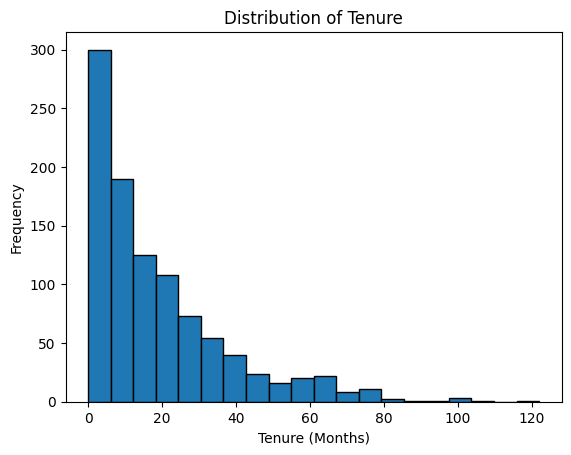

In [71]:
plt.hist(df['Tenure'], bins=20, edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

The histogram of tenure shows a right-skewed distribution, with a large number of customers having a short tenure. This indicates that a significant portion of customers churn early.

# **4. Feature engineering**

We will prepare the data for model training by converting categorical variables into a numerical format and separating the features (X) from the target variable (y).

- `Gender` is converted to numerical (1 for Female, 0 for Male).
- Other categorical features (`ContractType`, `InternetService`, and `TechSupport`) are one-hot encoded to create dummy variables.

In [72]:
y = df['Churn']
X = df.drop(['CustomerID', 'Churn'], axis=1)

In [75]:
X # 1 female 0 Male

,Age,Gender,Tenure,MonthlyCharges,TotalCharges,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_,InternetService_DSL,InternetService_Fiber Optic,TechSupport_No,TechSupport_Yes
0,49,0,4,88.35,353.40,True,False,False,False,False,True,False,True
1,43,0,0,36.67,0.00,True,False,False,False,False,True,False,True
2,51,1,2,63.79,127.58,True,False,False,False,False,True,True,False
3,60,1,8,102.34,818.72,False,True,False,False,True,False,False,True
4,42,0,32,69.01,2208.32,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42,0,41,37.14,1522.74,True,False,False,False,False,True,False,True
996,62,0,9,80.93,728.37,True,False,False,True,False,False,True,False
997,51,1,15,111.72,1675.80,True,False,False,False,False,True,False,True
998,39,0,68,65.67,4465.56,False,True,False,True,False,False,True,False


In [73]:
# Convert binary 'Gender' column to numerical
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

# Convert 'Churn' column to numerical (1 for 'Yes', 0 for 'No')
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print("Churn distribution in the target variable:")
print(y.value_counts())

Churn distribution in the target variable:
Churn
1    883
0    117
Name: count, dtype: int64


In [74]:
# Apply one-hot encoding to other categorical columns
X = pd.get_dummies(X, columns=['ContractType', 'InternetService', 'TechSupport'])

# **5. Model Training - Logistic Regression**

We use Logistic Regression due to its interpretability and effectiveness for binary classification problems like churn prediction. Before fitting the model, we apply preprocessing steps such as splitting the dataset into training and testing sets and feature scaling.

Given the imbalance in the target variable, we will use **stratified sampling** during the train-test split to ensure the proportion of churned and non-churned customers is similar in both sets.

In [51]:
from sklearn.model_selection import train_test_split

# Use stratified sampling due to imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Use transform on the test set

In [54]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [55]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# import model with joblib with LR_Churn_prediction_model
import joblib
joblib.dump(log_model, 'LR_Churn_prediction_model.pkl')


['LR_Churn_prediction_model.pkl']

# **6. Model Evaluation**

We evaluate the model using metrics such as accuracy, confusion matrix, precision, recall, and F1-score to understand its performance. These metrics help assess how well the model distinguishes between churned and retained customers. Since the dataset is imbalanced, we will pay close attention to precision, recall, and F1-score, as accuracy alone can be misleading.

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_model.predict(X_test)

In [78]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score:  0.965

Confusion Matrix:
 [[ 16   7]
 [  0 177]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        23
           1       0.96      1.00      0.98       177

    accuracy                           0.96       200
   macro avg       0.98      0.85      0.90       200
weighted avg       0.97      0.96      0.96       200



### Cross-validation

We use cross-validation to get a more robust estimate of the model's performance and to ensure that the model generalizes well to unseen data. We use 5 folds for cross-validation.

In [80]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(log_model, X, y, cv=5) # Using 5 folds

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

Cross-validation scores: [0.95  0.97  0.925 0.935 0.91 ]
Mean cross-validation score: 0.938
Standard deviation of cross-validation scores: 0.020639767440550263


### Prediction on new data

Here you can input new customer data to get a churn prediction. You will be asked to provide values for Age, Gender (0 for Male, 1 for Female), Tenure, and Monthly Charges. The output will indicate whether the customer is predicted to Churn or Not Churn.

**Note:** This prediction is based on the selected features (Age, Gender, Tenure, MonthlyCharges) and the trained Logistic Regression model. For a prediction using all features, the input process would need to be adjusted to include all one-hot encoded columns. Also, the input values will be scaled using the same scaler that was trained on the training data before prediction.

In [60]:
# To predict on new data using the full set of features, you would need to provide values for all one-hot encoded columns.
# For simplicity, this example demonstrates prediction with the original four features, scaled appropriately.
# To predict with all features, you would need to create a DataFrame with all columns (including the one-hot encoded ones)
# and ensure the column order matches the training data before scaling and prediction.

age = int(input("Enter Age: "))
gender = int(input("Enter Gender (0 for Male, 1 for Female): "))
tenure = int(input("Enter Tenure: "))
monthly_charges = float(input("Enter Monthly Charges: ")) # Changed to float for consistency

# Create a dictionary with the new data for the original features
new_data_dict = {
    'Age': [age],
    'Gender': [gender],
    'Tenure': [tenure],
    'MonthlyCharges': [monthly_charges]
}

# Create a DataFrame from the new data
new_data_df = pd.DataFrame(new_data_dict)

# To ensure the new data has the same columns as the training data (including one-hot encoded ones),
# we can create a DataFrame with all columns initialized to 0 and then fill in the values for the
# original features. This assumes the order of columns in the training data (X) is consistent.

# Get the column names from the training data
train_cols = X.columns

# Create a new DataFrame with all training columns and initialize with 0
new_data_processed = pd.DataFrame(0, index=[0], columns=train_cols)

# Fill in the values for the original features
new_data_processed['Age'] = age
new_data_processed['Gender'] = gender
new_data_processed['Tenure'] = tenure
new_data_processed['MonthlyCharges'] = monthly_charges

# Note: If you were getting input for the categorical features, you would need to
# update the corresponding one-hot encoded columns in new_data_processed based on the input.
# For this simplified example, we assume the new data only provides the original four features.

# Scale the new data using the *trained* scaler
new_data_scaled = scaler.transform(new_data_processed)

res = "Churn" if log_model.predict(new_data_scaled)[0] == 1 else "Not Churn"
print(f"Result: {res}")

Enter Age: 26
Enter Gender (0 for Male, 1 for Female): 1
Enter Tenure: 14
Enter Monthly Charges: 22
Result: Churn


# **7. Conclusion**

The Logistic Regression model achieved an accuracy of **96%** on the test set. The model can be improved with more data, advanced feature engineering, or different algorithms like Random Forest or XGBoost.
